In [2]:
import pandas as pd
import numpy as np


In [4]:
df= pd.read_csv("/home/jovyan/SnowEx-Map-Tool/GM_Pits.csv")

In [7]:
df.head()

,Location,Site,PitID,Date/Local Standard Time,UTM Zone,Easting (m),Northing (m),Latitude (deg),Longitude (deg),Precip Type,Precip Rate,Sky,Wind,Ground Condition,Ground Roughness,Ground Vegetation,Height of Ground Vegetation (cm),Canopy
0,Grand Mesa,County Line Open,COGMCO_20191219_1220,2019-12-19T12:20,12N,756848,4324359,39.030568,-108.032805,NaN,see Weather comments in _siteDetails file,Clear,Light,Frozen,Smooth,Grass,10,No Trees
1,Grand Mesa,County Line Open,COGMCO_20191220_1030,2019-12-20T10:30,12N,756902,4324360,39.030561,-108.032182,NaN,see Weather comments in _siteDetails file,Clear,Light,Frozen,Smooth,Grass,5,No Trees
2,Grand Mesa,County Line Open,COGMCO_20200122_1015,2020-01-22T10:15,12N,756902,4324356,39.030525,-108.032183,Very Light,see Weather comments in _siteDetails file,Overcast(complete cover),Light,Frozen,Smooth,Grass,10,No Trees
3,Grand Mesa,County Line Open,COGMCO_20200131_0830,2020-01-31T08:30,12N,756906,4324360,39.030560,-108.032136,NaN,see Weather comments in _siteDetails file,Clear,Light,Frozen,Smooth,Grass,20,No Trees
4,Grand Mesa,County Line Open,COGMCO_20200212_0852,2020-02-12T08:52,12N,756901,4324357,39.030534,-108.032195,Light,see Weather comments in _siteDetails file,Overcast(complete cover),Light,Frozen,Rough,Grass,8,No Trees


In [8]:
import geopandas as gpd
from shapely.geometry import Point

# Create a geometry column from the latitude and longitude
geometry = [Point(xy) for xy in zip(df['Longitude (deg)'], df['Latitude (deg)'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)


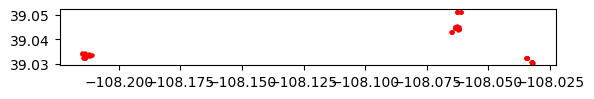

In [9]:
import matplotlib.pyplot as plt

# Plotting the GeoDataFrame
gdf.plot(marker='o', color='red', markersize=5)
plt.show()


In [10]:
import folium

# Create a map centered around the mean location
m = folium.Map(location=[df['Latitude (deg)'].mean(), df['Longitude (deg)'].mean()], zoom_start=12)

# Add the points to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude (deg)'], row['Longitude (deg)']],
        popup=f"Site: {row['Site']}<br>Date: {row['Date/Local Standard Time']}",
    ).add_to(m)

# Save the map to an HTML file
m.save('/home/jovyan/SnowEx-Map-Tool/map.html')


In [11]:
from IPython.display import display

display(m)
